# Digit recognization on the MNIST dataset
## Import libraries

In [1]:
import kaggle
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


In [2]:
# Set variables
path = "D:\\Datasets\\MNIST\\kaggle\\digit-recognizer\\"
image_path = "D:\\Datasets\\MNIST\\kaggle\\digit-recognizer\\"
train_file = "train.csv"
test_file = "test.csv"
labels_name = "label"

In [3]:
def import_csv(path,labelname,train,*args):
    train_tmp = pd.read_csv(path + train_file)
    test_tmp = pd.read_csv(path + test_file)
    return train_tmp.drop(labelname, axis = 1), train_tmp.pop(labelname), test_tmp

In [4]:
df_features, df_labels, df_features_test = import_csv(path,labels_name,train_file, test_file)

## Downloading the MNIST dataset and constructing dataframes

In [5]:
# kaggle.api.authenticate()
# kaggle.api.competitions_list()
# kaggle.api.competition_list_files('digit-recognizer')
# kaggle.api.competition_download_files('digit-recognizer', "D:\Datasets\MNIST\kaggle")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.20, random_state=42)

## Explore the data

In [15]:
y_train.iloc[352]

5

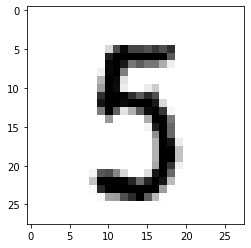

In [16]:
some_digit = X_train.values[352, :]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary',interpolation="nearest")

## Data preprocessing
### Scaling - is this needed considering all values are between 0-255?

### Future consideration: data augmentation by shifts and rotation of images

## Dimensionality reduction

## Try out differnt classifiers

### Decsion tree

In [9]:
clf_tree = DecisionTreeClassifier(max_depth=3)
clf_tree.fit(X_train, y_train)
scores = cross_val_score(clf_tree,  X_train, y_train, scoring="accuracy",cv=3)
scores

array([0.45894323, 0.48638271, 0.45592569])

### Support Vecor Machine with polynomial kernel

In [10]:

# Train model on reduced dataset because of computing time increasing in quadratic manner with sample size. 
# Alternative: there are other Support Vector Machines that relies on the Stochastic Gradient Descent method.
X_train_reduced = X_train[:6000]
y_train_reduced = y_train[:6000]

clf_svm = SVC(kernel='poly', degree=3, C=1)
clf_svm.fit(X_train, y_train)
scores = cross_val_score(clf_svm,  X_train, y_train, scoring="accuracy",cv=3)
scores

array([0.96956444, 0.96803286, 0.97142092])

In [17]:
clf_svm.predict(some_digit.reshape(1,-1))

array([5], dtype=int64)

### K-Nearest Neighbour

In [12]:
# X_train_reduced = X_train[:3000]
# y_train_reduced = y_train[:3000]

# clf_knear = KNeighborsClassifier(n_neighbors=7)
# clf_knear.fit(X_train_reduced, y_train_reduced)
# scores = cross_val_score(clf_knear,  X_train_reduced, y_train_reduced, scoring="accuracy",cv=3)
# scores

## Error analysis

## Grid search for model tuning

## Visualize the classifier

In [13]:
# Visualize the Decision tree classifier

# cn = ['0','1','2','3','4','5','6','7','8','9',]
# tree.plot_tree(clf_tree, feature_names=X_train.columns ,class_names=cn, filled = True)

In [20]:
svm_preds = clf_svm.predict(df_features_test)

In [21]:
svm_preds

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [27]:
svm_preds[21:22]

array([1], dtype=int64)

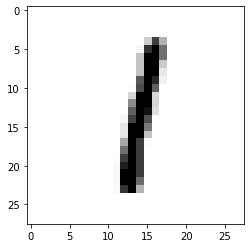

In [26]:
some_digit = df_features_test.values[21:22]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary',interpolation="nearest")

In [45]:
col = ["ImageId", "Label"]
out_preds = pd.DataFrame(svm_preds)
out_preds.index = out_preds.index+1

In [47]:
out_preds.to_csv("D:\\Datasets\\MNIST\\kaggle\\digit-recognizer\\svm_preds_1.csv")

In [39]:
svm_preds

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)